In [332]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline              
import os
import statistics
from scipy.stats import zscore

In [268]:
train = pd.read_csv("C://Users//AMIT YADAV//Downloads//NEW DATASET FROM KAGGLE//black-friday//BlackFriday.csv")

In [269]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [270]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [271]:
train.shape

(537577, 12)

In [272]:
train.User_ID.nunique()

5891

In [273]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [274]:
ntrain=train.drop(['Product_Category_3','Product_ID', 'User_ID'], axis=1)     

In [275]:
ntrain.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200


In [276]:
train.shape

(537577, 12)

In [277]:
ntrain.shape

(537577, 9)

In [278]:
#ntrain.info()

In [279]:
ntrain.Product_Category_2.value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [280]:
ntrain.Product_Category_2=ntrain.Product_Category_2.fillna(63058)

In [281]:
ntrain.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,63058.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,63058.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,63058.0,7969


In [282]:
ntrain.Product_Category_2=ntrain.Product_Category_2.astype(int,inplace=True)

In [283]:
ntrain.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [284]:
ntrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int32
Purchase                      537577 non-null int64
dtypes: int32(1), int64(4), object(4)
memory usage: 34.9+ MB


In [285]:
ntrain.Gender.unique() 

array(['F', 'M'], dtype=object)

In [286]:
ntrain.Gender.nunique() 

2

In [287]:
#ntrain.User_ID.value_counts()

In [288]:
ntrain.Age.value_counts()  #we can make dummy

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [289]:
ntrain.Age.nunique()

7

In [290]:
ntrain.Occupation.value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [291]:
ntrain.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [292]:
ntrain.City_Category.nunique()

3

In [293]:
ntrain.City_Category.value_counts()  #we can make dummy

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [294]:
ntrain.Stay_In_Current_City_Years.value_counts() #we can make dummy

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

In [295]:
ntrain.Marital_Status.value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [296]:
print(ntrain.Product_Category_1.isnull().sum())
print(ntrain.Product_Category_2.isnull().sum())

0
0


In [297]:
ntrain.Purchase.nunique()

17959

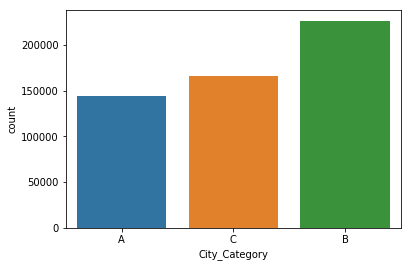

In [298]:
sns.countplot(ntrain.City_Category)

In [299]:
#plt.hist(ntrain.Age)

In [300]:
z=ntrain.drop('Purchase',axis=1)

In [301]:
t=pd.get_dummies(z)

In [302]:
t.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,63058,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,63058,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,63058,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [303]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 21 columns):
Occupation                       537577 non-null int64
Marital_Status                   537577 non-null int64
Product_Category_1               537577 non-null int64
Product_Category_2               537577 non-null int32
Gender_F                         537577 non-null uint8
Gender_M                         537577 non-null uint8
Age_0-17                         537577 non-null uint8
Age_18-25                        537577 non-null uint8
Age_26-35                        537577 non-null uint8
Age_36-45                        537577 non-null uint8
Age_46-50                        537577 non-null uint8
Age_51-55                        537577 non-null uint8
Age_55+                          537577 non-null uint8
City_Category_A                  537577 non-null uint8
City_Category_B                  537577 non-null uint8
City_Category_C                  537577 non-null uint8
Stay_In_C

In [304]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [305]:
scaled_t=sc.fit_transform(t)

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [306]:
x=scaled_t

In [307]:
y=ntrain.Purchase

In [308]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Applying Decision Tree Regressor

In [314]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg=DecisionTreeRegressor()
model=dtree_reg.fit(x_train,y_train)
predictions=dtree_reg.predict(x_test)

In [266]:
from sklearn import metrics
r2=metrics.r2_score(y_test,predictions)
r2

0.5885239377812514

# Applying Random Forest Regressor

In [318]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [319]:
model=rf.fit(x_train,y_train)
predictions=rf.predict(x_test)

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [320]:
from sklearn import metrics
r2=metrics.r2_score(y_test,predictions)
r2

0.6196382652860599